In [42]:
import pandas as pd
import os
import numpy as np
from scipy.optimize import minimize
import pandas as pd
from datetime import datetime
import pytz
import matplotlib.pyplot as plt

In [43]:
os.listdir()

['.ipynb_checkpoints',
 '20240226_AgentStatus_Data.csv',
 '20240226_Contact_Data.csv',
 '20240226_Contact_Data.zip',
 '20240228_Important_Fields.xlsx',
 '20240229_Risk_Data.csv',
 '20240229_Spectrum_Data.xlsx',
 '20240306_CommunicationData.csv',
 '20240306_CommunicationData.zip',
 '20240312_Contact_Update.txt',
 '2nd_draft_report.docx',
 'contact_final.csv',
 'contact_final1.csv',
 'dataserts to be used.png',
 'Days_contacts_Answered.csv',
 'Days_contacts_Answered_700.csv',
 'Days_contacts_volume_700.csv',
 'discussion of presentation.docx',
 'extra codes.ipynb',
 'First_Draft_Revised.docx',
 'Listener_is telehealth the answer to NZs GP crisis_2 March 2024.pdf',
 'MasterofAnalytics-Project-ProjectProspectus_S1_2024.pdf',
 'Merged_All.csv',
 'Merged_dataset.csv',
 'MH&A RP BUDGET 2023 - Current Practice.xlsx',
 'MId_project_report.docx',
 'MId_project_report_stasha.docx',
 'MoA_GuideforStudents2024sem1.pdf',
 'NTS Quarterly Report - Mental Health & Addictions - Q2 2024.pdf',
 'objective

In [66]:
#df4 = pd.read_csv( '20240226_Contact_Data.csv')
#df0 = pd.read_excel(r'C:\Users\ASUS\Desktop\Stat995 project\20240229_Spectrum_Data.xlsx')
#df3 = pd.read_excel(r'C:\Users\ASUS\Desktop\Stat995 project\spectrum_deleted.xlsx')#dtype={'contactId': 'int64'}
#df1 = pd.read_csv(r'C:\Users\ASUS\Desktop\Stat995 project\contact_final.csv')#dtype={'contactId': 'int64'}
#df5 = pd.read_excel(r'C:\Users\ASUS\Desktop\Stat995 project\spectrum_updated1.xlsx')
#df6 = pd.read_excel(r'C:\Users\ASUS\Desktop\Stat995 project\spectrum_updated.xlsx')
#df2 = pd.read_excel(r'C:\Users\ASUS\Desktop\Stat995 project\spectrum_updated2.xlsx')
#df3 = pd.read_csv(r'C:\Users\ASUS\Desktop\Stat995 project\Merged_dataset.csv')
#df4 = pd.read_csv(r'C:\Users\ASUS\Desktop\Stat995 project\contact_final1.csv')
#df4 = pd.read_csv(r'C:\Users\ASUS\Desktop\Stat995 project\Merged_dataset1.csv')
#df4 = pd.read_csv(r'C:/Users/ASUS/Desktop/Stat995 project/Merged_org_contspec.csv')
df = df = pd.read_csv(r'C:\Users\ASUS\Desktop\Stat995 project\contact_final1.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7384\1106522220.py:12: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = df = pd.read_csv(r'C:\Users\ASUS\Desktop\Stat995 project\contact_final1.csv')


In [67]:
df = df[df['Month'].isin([8, 9, 10, 11, 12, 1])]

In [68]:
df1 = df[df['abandoned'] == 0]


In [71]:
contacts_per_agent_hour = df1.groupby(['agentId', 'Time_N']).size().reset_index(name='contacts_count')
average_contacts_per_hour = contacts_per_agent_hour.groupby('agentId')['contacts_count'].mean().reset_index(name='avg_contacts_per_hour')
average_contacts_per_hour.mean()
average_contacts_per_hour.to_excel(r'C:\Users\ASUS\Desktop\Stat995 project\Contacts_Per_Hour.xlsx')

In [65]:
df['Date_N'] = pd.to_datetime(df['Date_N'])
Contacts_per_day = df.groupby(df['Date_N'].dt.date).size().reset_index(name='Count')
Contacts_700 = Contacts_per_day[Contacts_per_day['Count'] > 700]
Contacts_per_day_answered = df1.groupby(df['Date_N'].dt.date).size().reset_index(name='Count')
Contacts_500_Answered  = Contacts_per_day_answered[Contacts_per_day_answered['Count'] > 500]
contact_counts.to_csv('C:/Users/ASUS/Desktop/Stat995 project/Days_contacts.csv', index=False)
#path = r'C:\Users\ASUS\Desktop\Stat995 project\Number_of_contacts.xlsx'
#with pd.ExcelWriter(path, engine='xlsxwriter') as writer:
    Contacts_per_day.to_excel(writer, sheet_name='Contacts_per_day', index=False)
    Contacts_700.to_excel(writer, sheet_name='Contacts_700', index=False)
    Contacts_per_day_answered.to_excel(writer, sheet_name='Contacts_per_day_answered', index=False)
    Contacts_500_Answered.to_excel(writer, sheet_name='Contacts_500_Answered', index=False)

In [57]:
df = df[df['mediaTypeName'].str.contains('Call')]
df

,abandoned,abandonSeconds,ACWSeconds,agentId,agentSeconds,businessUnitId,callbackTime,campaignId,campaignName,contactId,...,createdAt,updatedAt,contactStartUTC_N,Date,Time,Month,Day,HT,Time_N,Date_N
986,1.0,231.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,4.280000e+11,...,33:54.3,48:54.4,2023-09-01 04:25:04.370000+12:00,01-09-2023,04:25:04,9,Friday,0.0,4:00 AM,2023-09-01
987,0.0,0.0,4.0,39252838,17.0,4605720,0.0,10358913,Mental Health & Addiction,4.280000e+11,...,33:54.3,03:53.2,2023-09-01 04:29:15.203000+12:00,01-09-2023,04:29:15,9,Friday,21.0,4:00 AM,2023-09-01
988,1.0,1232.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,4.280000e+11,...,33:54.3,48:54.4,2023-09-01 04:31:21.197000+12:00,01-09-2023,04:31:21,9,Friday,0.0,4:00 AM,2023-09-01
989,1.0,239.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,4.280000e+11,...,48:54.6,48:54.4,2023-09-01 04:39:51.990000+12:00,01-09-2023,04:39:52,9,Friday,0.0,4:00 AM,2023-09-01
991,1.0,736.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,4.280000e+11,...,19:14.8,48:54.4,2023-09-01 04:00:41.853000+12:00,01-09-2023,04:00:42,9,Friday,0.0,4:00 AM,2023-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85834,1.0,0.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,4.690000e+11,...,19:02.3,03:55.2,2023-08-23 12:11:51.977000+12:00,23-08-2023,12:11:52,8,Wednesday,0.0,12:00 PM,2023-08-23
85836,1.0,72.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,4.690000e+11,...,19:02.3,03:55.2,2023-08-23 12:12:41.007000+12:00,23-08-2023,12:12:41,8,Wednesday,0.0,12:00 PM,2023-08-23
85837,1.0,338.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,4.690000e+11,...,18:56.4,18:56.9,2023-08-23 12:13:18.980000+12:00,23-08-2023,12:13:19,8,Wednesday,0.0,12:00 PM,2023-08-23
85838,1.0,0.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,4.690000e+11,...,19:02.3,03:55.2,2023-08-23 12:13:40.453000+12:00,23-08-2023,12:13:40,8,Wednesday,0.0,12:00 PM,2023-08-23


In [71]:
#Current KPIs
def calculate_current_metrics(df):
    total_calls = len(df)
    calls_answered_within_limit = df[(df['abandoned'] == 0) & (df['inQueueSeconds'] <= 600)]['inQueueSeconds'].count()

    calls_abandoned_after_limit = df[(df['abandoned'] == 1) & (df['abandonSeconds'] > 120)]['abandonSeconds'].count()

    percent_answered_within_limit = (calls_answered_within_limit / total_calls) * 100
    percent_abandoned_after_limit = (calls_abandoned_after_limit / total_calls) * 100
    
    return percent_answered_within_limit, percent_abandoned_after_limit

current_answered_within_limit, current_abandoned_after_limit = calculate_current_metrics(df)
print(f"Current % Answered Within 10 Minutes: {current_answered_within_limit:.2f}%")
print(f"Current % Abandoned After 2 Minutes: {current_abandoned_after_limit:.2f}%")

Current % Answered Within 10 Minutes: 46.57%
Current % Abandoned After 2 Minutes: 23.82%


In [56]:
df = df[(df['abandoned'] == 0)]
df

,abandoned,abandonSeconds,ACWSeconds,agentId,agentSeconds,businessUnitId,callbackTime,campaignId,campaignName,confSeconds,...,transferIndicatorName,createdAt,updatedAt,contactStartUTC_N,Date,Time,Time_N,Day,HT,Month
971,0.0,0.0,0.0,39163378,3563.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,33:55.2,48:56.0,2023-08-02 03:24:10.060000+12:00,02-08-2023,3.24.10 AM,3:00 AM,Wednesday,3563.0,8
972,0.0,0.0,0.0,39142200,156.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,33:55.2,03:54.7,2023-08-02 03:24:35.750000+12:00,02-08-2023,3.24.36 AM,3:00 AM,Wednesday,156.0,8
973,0.0,0.0,0.0,39163378,1575.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,33:55.2,18:55.9,2023-08-02 03:32:20.607000+12:00,02-08-2023,3.32.21 AM,3:00 AM,Wednesday,1575.0,8
974,0.0,0.0,0.0,39142200,1532.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,48:55.0,33:56.0,2023-08-02 03:36:51.423000+12:00,02-08-2023,3.36.51 AM,3:00 AM,Wednesday,1532.0,8
975,0.0,0.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,48:56.4,48:56.2,2023-08-22 02:44:02.827000+12:00,22-08-2023,2.44.03 AM,2:00 AM,Tuesday,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85833,0.0,0.0,240.0,39142201,422.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,18:56.4,18:56.9,2023-08-23 12:08:56.143000+12:00,23-08-2023,12.08.56 PM,12:00 PM,Wednesday,662.0,8
85834,0.0,0.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,19:02.3,03:55.2,2023-08-23 12:11:51.977000+12:00,23-08-2023,12.11.52 PM,12:00 PM,Wednesday,0.0,8
85835,0.0,0.0,0.0,39163216,4857.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,18:56.4,34:00.8,2023-08-23 12:12:36.393000+12:00,23-08-2023,12.12.36 PM,12:00 PM,Wednesday,4857.0,8
85838,0.0,0.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,19:02.3,03:55.2,2023-08-23 12:13:40.453000+12:00,23-08-2023,12.13.40 PM,12:00 PM,Wednesday,0.0,8


In [68]:
calls_answered_within_limit = df[(df['abandoned'] == 0) & (df['inQueueSeconds'] <= 600)]['inQueueSeconds'].count()
calls_answered_within_limit

7462

In [69]:
calls_abandoned_after_limit = df[(df['abandoned'] == 1) & (df['abandonSeconds'] > 120)]['abandonSeconds'].count()
calls_abandoned_after_limit

3816

In [73]:
percent_answered_within_limit = (calls_answered_within_limit / 16023) * 100
percent_answered_within_limit   

46.570554827435565

In [74]:
percent_abandoned_after_limit = (calls_abandoned_after_limit / 16023) * 100
percent_abandoned_after_limit

23.815764838045308

In [41]:
unique_values = df['Date'].nunique()
print(unique_values)

32


In [62]:
#calls_per_day=22429/32          #filter just months 
#calls_per_day

#calls_per_day=16023/32          #Filter for months and calls
#calls_per_day

calls_per_day=16125/32          # filter for monts and answered contacts(all contacts 22429)
calls_per_day

#calls_per_day=85841/160         # without any filtration 
#calls_per_day

#calls_per_day=60652/149         # full dataset filtered for calls only
#calls_per_day

503.90625

In [63]:
target_calls_per_day = 184533/365
target_calls_per_day

505.56986301369864

In [ ]:
#df = pd.read_csv(r'C:\Users\ASUS\Desktop\Stat995 project\20240312_Contact_Update.txt', sep='\t', engine='python', on_bad_lines='skip', quotechar='"')
#df.to_excel(r'C:\Users\ASUS\Desktop\Stat995 project\spectrum_updated1.xlsx', index=False)

In [31]:
#df = pd.read_csv(r'C:\Users\ASUS\Desktop\Stat995 project\20240312_Contact_Update.txt', sep="\t", quotechar='"')
#df.to_excel(r'C:\Users\ASUS\Desktop\Stat995 project\spectrum_updated2.xlsx', index=False)  
dfd = dfa[dfa['agentId'] != 0]
hours_per_day = dfd.groupby(['agentId', 'Date']).agg({'Time_N': 'nunique'}).reset_index()
hours_per_day = hours_per_day.rename(columns={'Time_N': 'Hours Worked'})
average_hours_per_day = hours_per_day.groupby('agentId')['Hours Worked'].mean().reset_index(name='Average Hours Per Day')
average_hours_per_day = average_hours_per_day.sort_values('Average Hours Per Day', ascending=False)  # Sorting in descending order
days_per_month = dfd.groupby(['agentId', 'Month'])['Date'].nunique().reset_index()
days_per_month = days_per_month.rename(columns={'Date': 'Days Worked'})
average_days_per_month = days_per_month.groupby('agentId')['Days Worked'].mean().reset_index(name='Average Days Per Month')
average_days_per_month = average_days_per_month.sort_values('Average Days Per Month', ascending=False)  # Sorting in descending order
print(average_hours_per_day.head())  
print(average_days_per_month.head())  


In [4]:
df4

,abandoned,abandonSeconds,ACWSeconds,agentId,agentSeconds,businessUnitId,callbackTime,campaignId,campaignName,confSeconds,...,skillName,state,stateId,teamId,teamName,totalDurationSeconds,transferIndicatorId,transferIndicatorName,createdAt,updatedAt
0,0.0,0.0,0.0,39142083,9.0,4605720,0.0,10358896,Population Health,0.0,...,PH_Quit_OB,EndContact,18,10268218,PH_Quit_Pue_Amu,9.00,0,None,2023-05-05 04:00:50.5966667,2023-05-24 14:16:04.1100000
1,0.0,0.0,0.0,0,0.0,4605720,0.0,10358896,Population Health,0.0,...,PQ_PH_Quit_IVR,EndContact,18,0,NaN,0.39,0,None,2023-05-21 05:00:51.2133333,2023-05-24 14:16:04.1100000
2,0.0,0.0,2.0,34596397,24.0,4605720,0.0,10358912,Whakarongorau,0.0,...,Automated Outbound,EndContact,18,10268022,DefaultTeam,23.74,0,None,2023-05-26 03:30:51.3366667,2023-05-26 10:15:48.5033333
3,0.0,0.0,0.0,34596397,94.0,4605720,0.0,10358912,Whakarongorau,0.0,...,Automated Outbound,EndContact,18,10268022,DefaultTeam,94.28,0,None,2023-05-26 03:30:51.3366667,2023-05-26 10:15:48.5033333
4,0.0,0.0,2.0,34596397,142.0,4605720,0.0,10358912,Whakarongorau,0.0,...,Automated Outbound,EndContact,18,10268022,DefaultTeam,141.57,0,None,2023-05-26 03:30:51.3366667,2023-05-26 10:15:48.5033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778492,0.0,0.0,0.0,0,0.0,4605720,NaN,10358915,Health Services,0.0,...,PQ_OOH_ClinicalDivert,EndContact,18,0,NaN,0.00,0,None,2024-02-26 07:48:52.0833333,2024-02-26 07:48:52.0833333
2778493,NaN,NaN,NaN,0,NaN,4605720,NaN,10358915,Health Services,NaN,...,PQ_OOH_ClinicalDivert,Prequeue,9,0,NaN,NaN,0,None,2024-02-26 07:48:52.0833333,2024-02-26 07:48:52.0833333
2778494,0.0,0.0,0.0,0,0.0,4605720,NaN,10358915,Health Services,0.0,...,PQ_OOH_ClinicalDivert,EndContact,18,0,NaN,0.00,0,None,2024-02-26 07:48:52.0833333,2024-02-26 07:48:52.0833333
2778495,0.0,0.0,0.0,0,0.0,4605720,NaN,10358915,Health Services,0.0,...,PQ_OOH_ClinicalDivert,EndContact,18,0,NaN,0.00,0,None,2024-02-26 07:48:52.0833333,2024-02-26 07:48:52.0833333


In [5]:
#OBJECTIVE 4: ADDING DATE AND TIME COULMNS TO df0
df4['contactStartUTC'] = pd.to_datetime(df4['contactStartUTC'])
df4['contactStartUTC'] = df4['contactStartUTC'].dt.tz_localize('UTC')
nz_timezone = pytz.timezone('Pacific/Auckland')
df4['contactStartUTC_N'] = df4['contactStartUTC'].dt.tz_convert(nz_timezone)
df4 = df4.iloc[:1048576]
df4['contactStartUTC_N'] = pd.to_datetime(df4['contactStartUTC_N'])
df4['Date'] = df4['contactStartUTC_N'].dt.date
df4['Time'] = df4['contactStartUTC_N'].dt.time
df4['Time_N'] = df4['contactStartUTC_N'].dt.hour
df4['Month'] = df4['contactStartUTC_N'].dt.month
#ADDING DAY COLUMN 
df4['Date'] = pd.to_datetime(df4['Date'])
start_date = pd.to_datetime('05-05-2023')
start_day_of_week = start_date.dayofweek  
df4['days_from_start'] = (df4['Date'] - start_date).dt.days
df4['days_from_tuesday'] = (df4['days_from_start'] + start_day_of_week) % 7
days_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df4['Day'] = df4['days_from_tuesday'].map(days_mapping)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_31072\942823470.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['contactStartUTC_N'] = pd.to_datetime(df4['contactStartUTC_N'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_31072\942823470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Date'] = df4['contactStartUTC_N'].dt.date
C:\Users\ASUS\AppData\Local\Temp\ipykernel_31072\942823470.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [6]:
df4['HT'] = df4['ACWSeconds'] + df4['agentSeconds']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31072\1665781820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['HT'] = df4['ACWSeconds'] + df4['agentSeconds']


In [7]:
df5 = df4.drop(['days_from_start', 'days_from_tuesday'], axis=1)


In [8]:
df6 = df5[df5['campaignName'].str.contains('Mental Health & Addiction')]
df6

,abandoned,abandonSeconds,ACWSeconds,agentId,agentSeconds,businessUnitId,callbackTime,campaignId,campaignName,confSeconds,...,transferIndicatorName,createdAt,updatedAt,contactStartUTC_N,Date,Time,Time_N,Month,Day,HT
11,0.0,0.0,237.0,39163038,1307.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,2023-05-31 03:00:48.7400000,2023-06-01 15:45:52.8366667,2023-05-31 02:59:30.377000+12:00,2023-05-31,02:59:30.377000,2,5,Wednesday,1544.0
13,0.0,0.0,3.0,39142811,1672.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,2023-05-31 03:15:48.6400000,2023-06-01 15:45:52.8366667,2023-05-31 03:09:41.303000+12:00,2023-05-31,03:09:41.303000,3,5,Wednesday,1675.0
14,0.0,0.0,135.0,39163463,3512.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,2023-05-31 03:15:48.6400000,2023-06-02 09:45:52.2033333,2023-05-31 03:11:05.703000+12:00,2023-05-31,03:11:05.703000,3,5,Wednesday,3647.0
15,0.0,0.0,240.0,39142836,732.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,2023-05-31 03:15:48.6400000,2023-06-01 15:45:52.8366667,2023-05-31 03:13:40.353000+12:00,2023-05-31,03:13:40.353000,3,5,Wednesday,972.0
17,0.0,0.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,2023-05-31 03:15:55.5633333,2023-06-01 11:45:49.8966667,2023-05-31 03:15:47.157000+12:00,2023-05-31,03:15:47.157000,3,5,Wednesday,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048541,1.0,72.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,2023-08-23 12:19:02.3066667,2023-08-23 14:03:55.2333333,2023-08-23 12:12:41.007000+12:00,2023-08-23,12:12:41.007000,12,8,Wednesday,0.0
1048552,1.0,338.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,2023-08-23 12:18:56.4166667,2023-08-23 14:18:56.8966667,2023-08-23 12:13:18.980000+12:00,2023-08-23,12:13:18.980000,12,8,Wednesday,0.0
1048556,0.0,0.0,0.0,0,0.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,2023-08-23 12:19:02.3066667,2023-08-23 14:03:55.2333333,2023-08-23 12:13:40.453000+12:00,2023-08-23,12:13:40.453000,12,8,Wednesday,0.0
1048558,0.0,0.0,0.0,39163216,1505.0,4605720,0.0,10358913,Mental Health & Addiction,0.0,...,None,2023-08-23 12:18:56.4166667,2023-08-23 14:48:56.8233333,2023-08-23 12:13:48.540000+12:00,2023-08-23,12:13:48.540000,12,8,Wednesday,1505.0


In [9]:
df6.to_csv(r'C:/Users/ASUS/Desktop/Stat995 project/contact_final.csv')

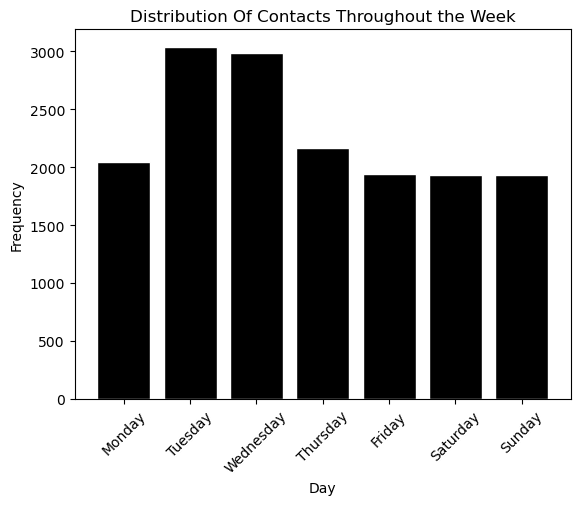

In [67]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df4['Day'] = pd.Categorical(df4['Day'], categories=days_order, ordered=True)
day_counts = df4['Day'].value_counts().sort_index()
plt.bar(day_counts.index, day_counts.values, color='black', edgecolor='white')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Distribution Of Contacts Throughout the Week')
plt.xticks(rotation=45) 
plt.show()


In [14]:
#OBJECTIVE 1: DISTRIBUTION OF CONTACTS THROUGHOUT DAY
plt.figure(figsize=(10, 6))
colummn_name= df4.columns
hours_ordered = ['12 AM', '01 AM', '02 AM', '03 AM', '04 AM',
                 '05 AM', '06 AM', '07 AM', '08 AM', '09 AM',
                 '10 AM', '11 AM', '12 PM', '01 PM', '02 PM',
                 '03 PM', '04 PM', '05 PM', '06 PM', '07 PM',
                 '08 PM', '09 PM', '10 PM', '11 PM']
df4['Time_N'].value_counts().loc[hours_ordered ].plot.bar(color='black', edgecolor='white')
#df4['Time_N'].plot.bar(color='black', edgecolor='white', bins=24)
plt.title('Distribution Of Contacts Throughout the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()

KeyError: 'Time_N'

<Figure size 1000x600 with 0 Axes>

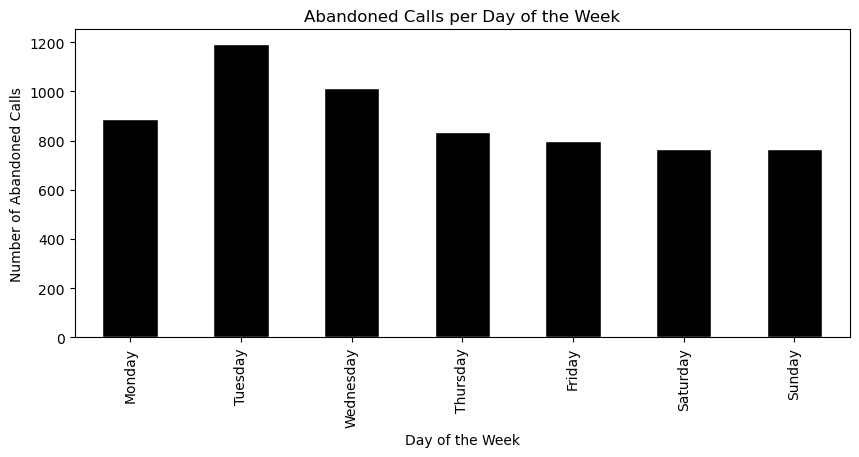

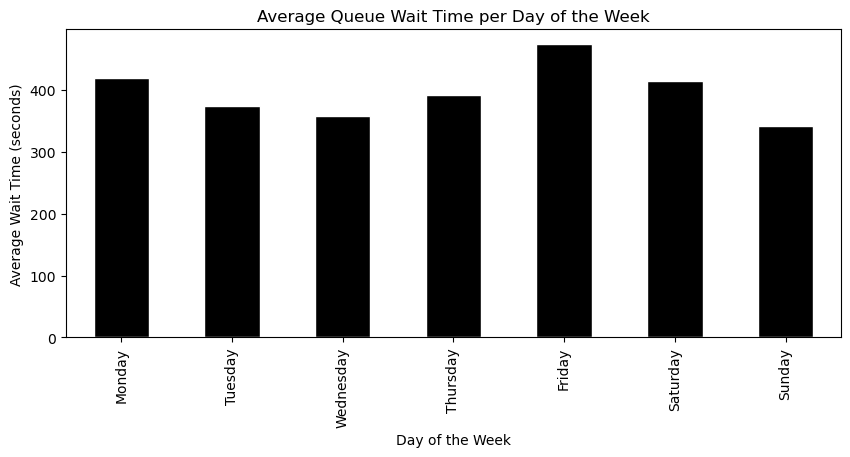

In [69]:
#Analysis by Day
# Abandoned calls analysis
abandoned_calls_by_day = df4[df4['abandoned'] == 1].groupby('Day')['contactId'].count()
plt.figure(figsize=(10, 4))
abandoned_calls_by_day.plot(kind='bar', color='black', edgecolor='white')
plt.title('Abandoned Calls per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Abandoned Calls')
plt.show()
# Queue wait time analysis
average_wait_by_day = df4.groupby('Day')['inQueueSeconds'].mean()
plt.figure(figsize=(10, 4))
average_wait_by_day.plot(kind='bar', color='black', edgecolor='white')
plt.title('Average Queue Wait Time per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Wait Time (seconds)')
plt.show()


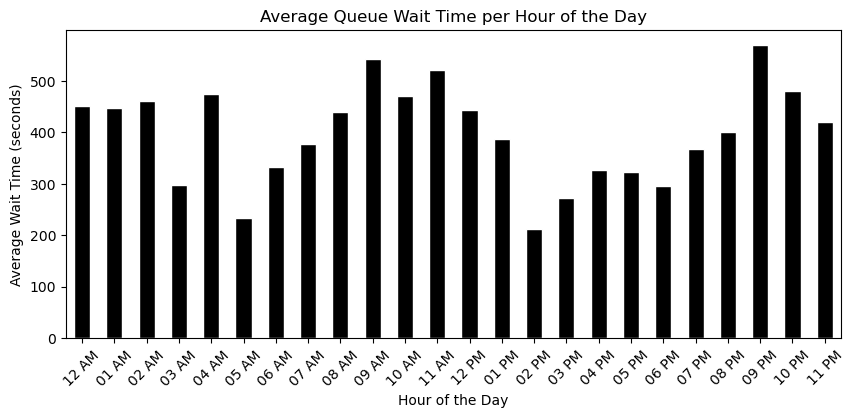

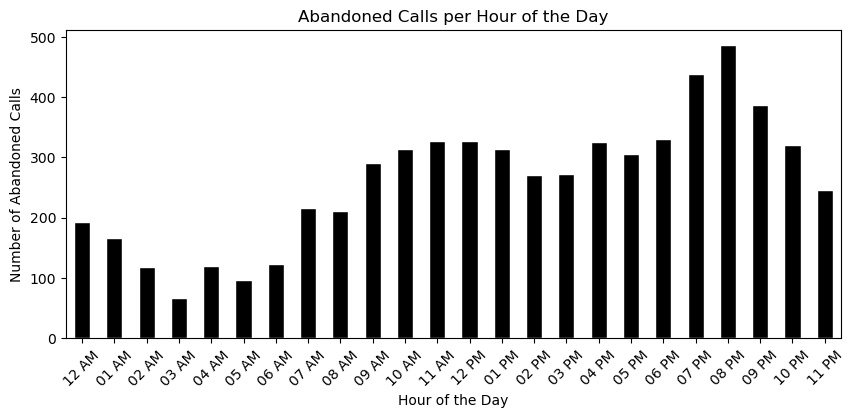

In [71]:
#Analysis by Time
abandoned_calls_by_hour = df4[df4['abandoned'] == 1].groupby('Time_N')['contactId'].count()
average_wait_by_hour = df4.groupby('Time_N')['inQueueSeconds'].mean()
hours_ordered = ['12 AM', '01 AM', '02 AM', '03 AM', '04 AM',
                 '05 AM', '06 AM', '07 AM', '08 AM', '09 AM',
                 '10 AM', '11 AM', '12 PM', '01 PM', '02 PM',
                 '03 PM', '04 PM', '05 PM', '06 PM', '07 PM',
                 '08 PM', '09 PM', '10 PM', '11 PM']

average_wait_by_hour = average_wait_by_hour.reindex(hours_ordered)
abandoned_calls_by_hour = abandoned_calls_by_hour.reindex(hours_ordered)

# Plotting
plt.figure(figsize=(10, 4))
average_wait_by_hour.plot(kind='bar', color='black', edgecolor='white')
plt.title('Average Queue Wait Time per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Wait Time (seconds)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 4))
abandoned_calls_by_hour.plot(kind='bar', color='black', edgecolor='white')
plt.title('Abandoned Calls per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Abandoned Calls')
plt.xticks(rotation=45)
plt.show()


In [59]:
#Find AHT to meet demand
#AHT = df5['HT'].mean()
AHT = 1048.1

In [60]:
AHT_Min = AHT/60
AHT_Min

17.46833333333333

In [61]:
unique_values = df4['Date'].nunique()
print(unique_values)


32


In [62]:
calls_per_day=16023/32
calls_per_day

500.71875

In [64]:
target_calls_per_day = 184533/365
target_calls_per_day

505.56986301369864

In [65]:
target_service_level = 0.95
target_abandon_rate = 0.10
current_sl = 0.64 
current_ar = 0.31

# Functions to estimate required AHT to meet SL and AR targets
def estimate_required_aht_to_meet_sl(target_sl, current_sl, AHT):
    improvement_factor = target_sl / current_sl
    required_aht = AHT / improvement_factor
    return required_aht

def estimate_required_aht_to_meet_ar(target_ar, current_ar, AHT):
    improvement_factor = (1 - target_ar) / (1 - current_ar)
    required_aht = AHT * improvement_factor
    return required_aht

# Check if we need to adjust AHT based on target calls per day
if target_calls_per_day > calls_per_day:
    # Assuming that to meet the target_calls_per_day, AHT needs to be adjusted proportionally
    AHT_Required = AHT * (calls_per_day / target_calls_per_day)

# Calculate required AHT for SL and AR
required_aht_for_sl = estimate_required_aht_to_meet_sl(target_service_level, current_sl, AHT)
required_aht_for_ar = estimate_required_aht_to_meet_ar(target_abandon_rate, current_ar, AHT)

print("Stricter AHT requirement to meet both SL and AR targets:", AHT_Required)


Stricter AHT requirement to meet both SL and AR targets: 1038.0431277027685


In [66]:
REQ_AHT_Min=1038.0431277027685/60
REQ_AHT_Min

17.30071879504614

In [102]:
#df2.to_csv(r'C:\Users\ASUS\Desktop\Stat995 project\contact_final.csv')

In [103]:
#OBJECTIVE 1: Merging of spectrum1 and spectrum2 data
#df = pd.merge(df5, df0, on='Token', how='inner')
#df.to_csv(r'C:\Users\ASUS\Desktop\Stat995 project\spectrum_final.csv', index=False)


In [104]:
#df = pd.merge(df3, df4, on='contactId', how='inner')


In [105]:
#df = pd.merge(df0, df1, on='contactId', how='inner')
#df

In [106]:
#df_try = pd.merge(df0, df5, on='contactId', how='inner')
#df_try

In [107]:
#df_try1 = pd.merge(df0, df6, on='contactId', how='inner')
#df_try1

In [108]:
#df_try2 = pd.merge(df1, df_try, on='contactId', how='inner')
#df_try2

In [109]:
#df_try3 = pd.merge(df0, df7, on='contactId', how='inner')
#df_try3

In [110]:
#df_try4 = pd.concat([df1, df7])
#df_try4